<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [5]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.983803  59.569123  21.326375  ...  145.295668  144.837888  0.457780
      1.0    81.854916  45.530040  49.946229  ...  187.763736  187.636415  0.127321
      2.0    28.068800  86.417842  68.984240  ...  192.246721  193.092500 -0.845779
      3.0    92.997974  77.989154  84.055826  ...  266.441657  265.248458  1.193199
      4.0    25.081975  44.974484  44.218181  ...  123.913513  124.132147 -0.218633
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.595436  30.350739  48.912061  ...  140.402108  139.354401  1.047708
      16.0   61.105174  62.483395  25.222228  ...  158.411503  159.076309 -0.664806
      17.0   44.193650  50.343925  98.628085  ...  201.674010  202.721061 -1.047051
      18.0   88.571172  40.245329  75.171746  ...  214.716788  213.640775  1.076014
      19.0   65.077635  63.508413  43.738925  ...  182.039789  182.282030 -0.242241

[20000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.983803  59.569123  21.326375  ...  145.295668  144.837888  0.457780
      1.0    81.854916  45.530040  49.946229  ...  187.763736  187.636415  0.127321
      2.0    28.068800  86.417842  68.984240  ...  192.246721  193.092500 -0.845779
      3.0    92.997974  77.989154  84.055826  ...  266.441657  265.248458  1.193199
      4.0    25.081975  44.974484  44.218181  ...  123.913513  124.132147 -0.218633
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.595436  30.350739  48.912061  ...  140.402108  139.354401  1.047708
      16.0   61.105174  62.483395  25.222228  ...  158.411503  159.076309 -0.664806
      17.0   44.193650  50.343925  98.628085  ...  201.674010  202.721061 -1.047051
      18.0   88.571172  40.245329  75.171746  ...  214.716788  213.640775  1.076014
      19.0   65.077635  63.508413  43.738925  ...  182.039789  182.282030 -0.242241

[20000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.983803  59.569123  21.326375  ...  145.295668  144.837888  0.457780
      1.0    81.854916  45.530040  49.946229  ...  187.763736  187.636415  0.127321
      2.0    28.068800  86.417842  68.984240  ...  192.246721  193.092500 -0.845779
      3.0    92.997974  77.989154  84.055826  ...  266.441657  265.248458  1.193199
      4.0    25.081975  44.974484  44.218181  ...  123.913513  124.132147 -0.218633
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.595436  30.350739  48.912061  ...  140.402108  139.354401  1.047708
      16.0   61.105174  62.483395  25.222228  ...  158.411503  159.076309 -0.664806
      17.0   44.193650  50.343925  98.628085  ...  201.674010  202.721061 -1.047051
      18.0   88.571172  40.245329  75.171746  ...  214.716788  213.640775  1.076014
      19.0   65.077635  63.508413  43.738925  ...  182.039789  182.282030 -0.242241

[20000 rows x 7 columns]

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

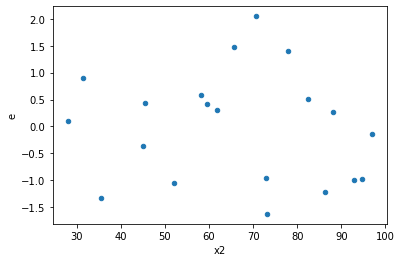

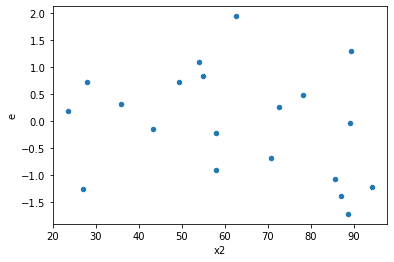

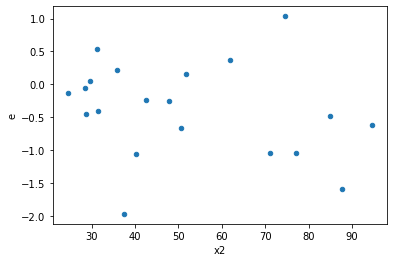

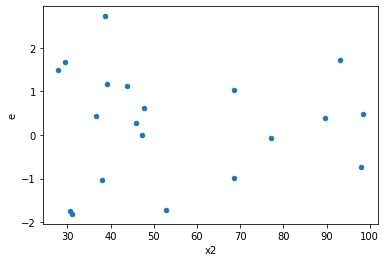

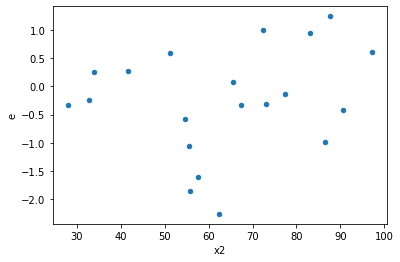

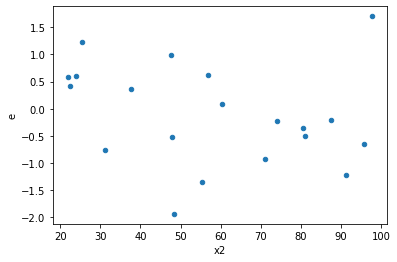

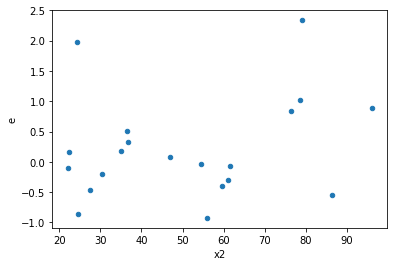

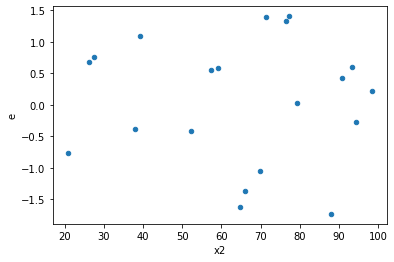

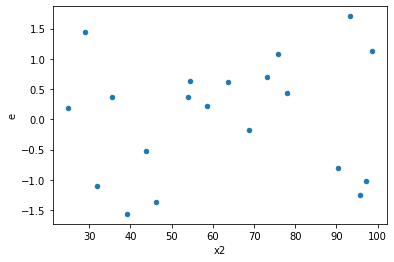

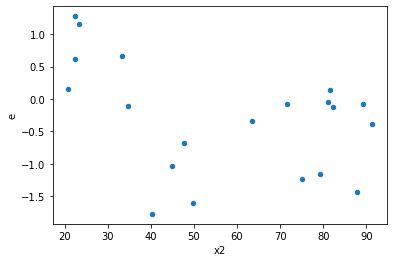

In [14]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,4.460534890455778,3.7105353030851944,1.1151337226139444,0.9276338257712986,1.2021270587957973,0.8448327879601958,0.5775836060199021,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,6.144401352862149,0.27981001822427043,1.5361003382155372,0.06995250455606761,21.959189995611066,0.004102638978219053,0.9979486805108905,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,2.5950988845428515,1.7696528760077754,0.6487747211357129,0.44241321900194386,1.4664451541464052,0.6846563931011462,0.6576718034494269,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,2.9476037165380857,2.2235319268404887,0.7369009291345214,0.5558829817101222,1.3256403836424608,0.7646149861002107,0.6176925069498946,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,3.358611460564882,2.8906862395521915,0.8396528651412205,0.7226715598880479,1.161873403834094,0.8732418240205528,0.5633790879897236,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,6.643290139184851,5.340067442754548,1.6608225347962127,1.335016860688637,1.2440461118517383,0.81646550399241,0.591767248003795,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,2.3699569469861257,2.3314973817213245,0.5924892367465314,0.5828743454303311,1.0164956502058804,0.9861130627452808,0.5069434686273596,Reject001=1 : Homoscedasticity
10.0,5.0,5.0,5.7638762840390525,2.092053997224843,1.4409690710097631,0.5230134993062108,2.755127875133703,0.29027697048258827,0.8548615147587059,Reject001=1 : Homoscedasticity
11.0,5.0,5.0,4.720820075848561,2.6029686774455323,1.1802050189621403,0.6507421693613831,1.8136292291006044,0.529348090189079,0.7353259549054605,Reject001=1 : Homoscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,4.460534890455778,3.7105353030851944,1.1151337226139444,0.9276338257712986,1.2021270587957973,1.1551672120398042,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,6.144401352862149,0.27981001822427043,1.5361003382155372,0.06995250455606761,21.959189995611066,0.004102638978219053,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,2.5950988845428515,1.7696528760077754,0.6487747211357129,0.44241321900194386,1.4664451541464052,1.3153436068988538,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.9243048145626649,6.372842952507266,0.23107620364066622,1.5932107381268166,0.14503806565624153,0.053832914895869846,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,1.1105496494419698,3.338337480116388,0.27763741236049244,0.834584370029097,0.33266548276097346,0.2523417412414007,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,2.9476037165380857,2.2235319268404887,0.7369009291345214,0.5558829817101222,1.3256403836424608,1.2353850138997893,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,2.718305025810922,4.456453567117491,0.6795762564527305,1.1141133917793729,0.6099704585431521,0.6006902765890931,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,3.358611460564882,2.8906862395521915,0.8396528651412205,0.7226715598880479,1.161873403834094,1.1267581759794472,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,6.643290139184851,5.340067442754548,1.6608225347962127,1.335016860688637,1.2440461118517383,1.18353449600759,Reject001=1 : Homoscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      979
Reject001=0 : Heteroscedasticity     21
Name: Result_test, dtype: int64